In [1]:
# Import the necessary stuff
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt 
from sympy import *
import control

# define a symbolic variable
x = symbols('x')

In [2]:
# Plot the poles and zeros of a transfer function
def plotPoleZeroPlot(numerator, denominator):
    
    transferFunction = control.tf(numerator, denominator)

    # Get the poles and zeros
    poles = transferFunction.pole()
    zeros = transferFunction.zero()

    # Find the re-im of the poles
    a = [x.real for x in poles]
    b = [x.imag for x in poles]

    # Find the re-im of the zeros
    c = [x.real for x in zeros]
    d = [x.imag for x in zeros]

    # Plot them and create a layout
    plt.title("Poles/zeros plot of the transfer function")
    plt.scatter(a,b, marker="x")
    plt.scatter(c,d)
    plt.grid(True, which='both')
    plt.xlabel("real part")
    plt.ylabel("imaginar part")
    plt.axhline(0)
    plt.axvline(0)
    plt.show()


In [3]:
# Plot the impulse response
def plotImpulseResponse(numerator, denominator):
    
    transferFunction = control.tf(numerator, denominator)
    T, yout = control.impulse_response(transferFunction)
    
    plt.plot(T, yout)
    plt.title("Impulse response of h(s)")
    plt.xlabel("Time")
    plt.ylabel("h(t)")
    plt.show()


In [4]:
# Plot the step response 
def plotStepResponse(numerator, denominator):
    
    transferFunction = control.tf(numerator, denominator)
    T, yout = control.step_response(transferFunction)
    
    plt.plot(T, yout)
    plt.title("Step response of h(s)")
    plt.xlabel("Time")
    plt.ylabel("h(t)")
    plt.show()


In [5]:
# Convert a control library representation to a sympy one
# Ignore this one
def controlToSympy(num, den):
    
    # Create a sympy fraction
    numSym = 0
    denSym = 0
    
    for counter, coefficient in enumerate(reversed(num)):
        numSym += coefficient*x**counter
    
    for counter, coefficient in enumerate(reversed(den)):
        denSym += coefficient*x**counter
    
    return numSym/denSym


In [6]:
# Extract each mode, ignore this
def extractModes(num, den):

    # Get the fraction
    symFraction = controlToSympy(num, den)
    
    # Get the partial fraction decomposition
    partialFracDecomped = apart(symFraction).as_ordered_terms()
    
    # The list of fractions
    listOfFractions = []

    # Decompose the fractions and add it to the list
    for subFractions in partialFracDecomped:
        # Decompose a fraction into numerator and denominator
        numCont, denCont = fraction(subFractions)
        # Extract the coefficients and convert to correct type
        numPolynom = [int(e) for e in Poly(numCont, x).all_coeffs()]
        denPolynom = [int(e) for e in Poly(denCont, x).all_coeffs()]
        listOfFractions.append([numPolynom, denPolynom])

    return listOfFractions


In [7]:
# Plot all the modes of the transfer function
def plotModes(numerator, denominator):
    
    # Extract the modes of the transfer function
    modes = extractModes(numerator, denominator)
    
    # Plot each mode independently
    for mode in modes:
        num,den = mode
        transfer = control.tf(num,den)
        T, yout = control.impulse_response(transfer)
        plt.plot(T,yout)
    
    # Add some information to the plot
    plt.title("Impulse response of all the modes")
    plt.xlabel("Time")
    plt.ylabel("h(t)")
    plt.show()


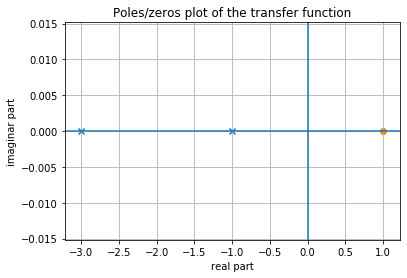

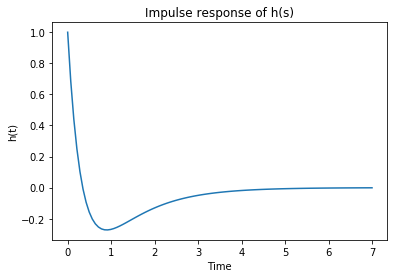

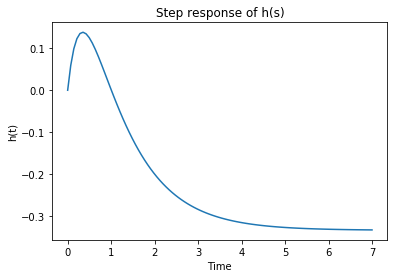

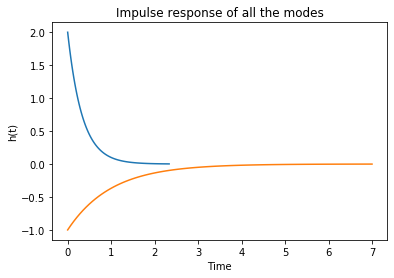

In [9]:
# Define the transfer function
#
# example:
#           s - 1             numerator   = [1, -1]
# H = ----------------- =>    denominator = [1, 4, 3]
#       s^2 + 4 s + 3
#
numerator = [1, -1]
denominator = [1, 4, 3]

# Plot the various things
plotPoleZeroPlot(numerator, denominator)
plotImpulseResponse(numerator, denominator)
plotStepResponse(numerator, denominator)
plotModes(numerator, denominator)
